# DSCI 523 Lab Assignment 4

## Mapping & nested data frames, as well as tidy evaluation

## Lab Mechanics

rubric={4}

- All files necessary to run your work must be pushed to your GitHub.ubc.ca repository for this lab.
- You need to have a minimum of 3 commit messages associated with your GitHub.ubc.ca repository for this lab.
- You must also submit this `.ipynb` notebook of this homework to Gradescope, and it must be executed so the TA's can see the results of your work.
- **There is autograding in this lab, so please do not move or rename this file. Also, do not copy and paste cells, if you need to add new cells, create new cells via the "Insert a cell below" button instead.**
- Follow the [MDS general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

## Code Quality
rubric={quality:15}

The code that you write for this assignment will be given one overall grade for code quality, see our code quality rubric as a guide to what we are looking for. Also, for this course (and other MDS courses that use R), we are trying to follow the tidyverse code style. There is a guide you can refer too: http://style.tidyverse.org/

Each code question will also be assessed for code accuracy (i.e., does it do what it is supposed to do?).

## Writing 
rubric={writing:5}

To get the marks for this writing component, you should:

- Use proper English, spelling, and grammar throughout your submission (the non-coding parts).
- Be succinct. This means being specific about what you want to communicate, without being superfluous.

## Table of contents

1. [Exercise 1: nesting](#Exercise-1:-nesting)

2. [Exercise 2: mapping and nesting](#Exercise-2:-mapping-and-nesting)

3. [Exercise 3: programming with {dplyr}](#Exercise-3:-programming-with-{dplyr})

4. [Exercise 4: programming with {dplyr} when there is reassignment](#Exercise-4:-programming-with-{dplyr}-when-there-is-reassignment)

5. [Exercise 5: (Optional)](#Exercise-5:-(Optional))

8. [Submission instructions](#Submission)

Run the cell below to load the libraries needed for this lab, as well as the test file so you can check your answers as you go!

In [13]:
library(nycflights13)
library(palmerpenguins)
library(rlang)
library(testthat)
library(tidyverse)
# library(ggthemes)
options(repr.matrix.max.rows = 10)

## Exercise 1: nesting
rubric={accuracy:10,reasoning:5}

Using the {palmerpenguins} `penguins` data set, demonstrate the use of `nest` and `unnest`. First create a data frame where all data, except for the `species` and `island` columns are nested into one column named `data`. Then demonstrate how you can unnest this data frame so that you get back the original data frame.

In 2-3 sentences, explain what kind of column the nested data became. What was the type of the elements inside that column? Comment on their dimensions.

In [14]:
# BEGIN SOLUTION
penguins_nested <- penguins %>% 
    group_by(species, island) %>% 
    nest()
print(penguins_nested)

penguins_unnested <- penguins_nested %>% 
    unnest(cols = c(data))
print(penguins)
print(penguins_unnested)
# END SOLUTION

# A tibble: 5 × 3
# Groups:   species, island [5]
  species   island    data              
  <fct>     <fct>     <list>            
1 Adelie    Torgersen <tibble [52 × 6]> 
2 Adelie    Biscoe    <tibble [44 × 6]> 
3 Adelie    Dream     <tibble [56 × 6]> 
4 Gentoo    Biscoe    <tibble [124 × 6]>
5 Chinstrap Dream     <tibble [68 × 6]> 
# A tibble: 344 × 8
   species island    bill_length_mm bill_depth_mm flipper_…¹ body_…² sex    year
   <fct>   <fct>              <dbl>         <dbl>      <int>   <int> <fct> <int>
 1 Adelie  Torgersen           39.1          18.7        181    3750 male   2007
 2 Adelie  Torgersen           39.5          17.4        186    3800 fema…  2007
 3 Adelie  Torgersen           40.3          18          195    3250 fema…  2007
 4 Adelie  Torgersen           NA            NA           NA      NA NA     2007
 5 Adelie  Torgersen           36.7          19.3        193    3450 fema…  2007
 6 Adelie  Torgersen           39.3          20.6        190    3650 male   

The nested data was in a column that of type list column. The elements inside the list column are of type tibble.

## Exercise 2: mapping and nesting
rubric={accuracy:10,reasoning:5}

Working with the {nycflights13} `weather` data set which contains hourly
meterological data for LGA, JFK and EWR, obtain the minimum, maximum and
average temperature for each month for each origin without dropping the 
rest of the data in the data frame. Keep all the data associated with the 
monthly records for each origin in the same row as the summary statistics 
you calculate for that record. You will have to nest the data to do this.

The {tidyr} `nest`, {dplyr} `mutate` and {purrr} `map` functions should 
allow you to accomplish this. Your resultant data frame should contain the following 6
columns: `origin`, `month`, `data` (nested data frames), `min_temp`,
`max_temp` and `avg_temp`.

Look at your output, and consider the other way you could have arrived at your
summary statistics (`group_by` + `summarise`). What would have been different 
about your results had you obtained them that way instead? Explain this in 1-2 
sentences.

In [15]:
# BEGIN SOLUTION
weather_nested <- weather %>% 
  group_by(origin, month) %>% 
  nest() %>% 
  mutate(min_temp = map_dbl(data, ~ min(.x$temp, na.rm = TRUE)),
         max_temp = map_dbl(data, ~ max(.x$temp, na.rm = TRUE)),
         avg_temp = map_dbl(data, ~ mean(.x$temp, na.rm = TRUE)))
print(weather_nested)
# END SOLUTION

# A tibble: 36 × 6
# Groups:   origin, month [36]
   origin month data                min_temp max_temp avg_temp
   <chr>  <int> <list>                 <dbl>    <dbl>    <dbl>
 1 EWR        1 <tibble [742 × 13]>     10.9     64.4     35.6
 2 EWR        2 <tibble [669 × 13]>     16.0     55.9     34.3
 3 EWR        3 <tibble [743 × 13]>     26.1     60.1     40.1
 4 EWR        4 <tibble [720 × 13]>     30.9     84.0     53.0
 5 EWR        5 <tibble [744 × 13]>     43.0     93.0     63.3
 6 EWR        6 <tibble [720 × 13]>     55.0     93.9     73.3
 7 EWR        7 <tibble [741 × 13]>     64.0    100.      80.7
 8 EWR        8 <tibble [740 × 13]>     59       90.0     74.5
 9 EWR        9 <tibble [719 × 13]>     48.0     95       67.3
10 EWR       10 <tibble [736 × 13]>     33.1     89.1     59.8
# … with 26 more rows


If we had used `group_by` + `summarise` instead to obtain minimum, maximum and
average temperature for each month for each origin, the we would not have been able to keep the original data associated with these summary statistics - they would have had to be kept in different data frames.

## Exercise 3: programming with {dplyr}
rubric={accuracy:10}

Write a wrapper function for the {dplyr} `filter` + {stringr} `str_detect` functions to create a function to filter for rows that contain a full or partial string match. Your function should take a data frame, an unquoted column name (not as a string), and a string pattern to search for. It should return a data frame with rows that match the pattern searched for in the column specified. Follow good software development practices:
- document your function using `roxygen2`
- deal with erroneous user inputs
- write tests to ensure that your function works as expected

*Hint: yet again you will want to generate some helper data for your tests...*


In [16]:
# BEGIN SOLUTION
#' Filter for rows that contain a full or partial string match.
#'
#' @param x a data frame or tibble
#' @param col_name the column name on which to search for matching values
#' @param pattern character vector of length one containing the pattern on which to search for
#'
#' @return a data frame with the rows where the pattern matches the values in the column specified
#'
#' @examples
#' library(gapminder)
#' filter_str(gapminder, country, "Can")
partial_match <- function(x, col_name, pattern) {
    if (!is.data.frame(x)) {
        stop("x should be a data frame")
    }
    if (!is.character(pattern) | length(pattern) != 1) {
        stop("pattern should be a character vector of length 1")
    }
    filter(x, str_detect({{col_name}}, pattern))
}

# helper data for tests
helper_data <- tibble(country = c("Canada", "United States"), 
                      acronym = c("CA", "USA"),
                      pop_in_millions = c(37.59, 328.2))
can_row <- tibble(country = "Canada", acronym = "CA", pop_in_millions = 37.59)
us_row <- tibble(country = "United States", acronym = "USA", pop_in_millions = 328.2)
empty_data <- tibble(country = character(), acronym = character(), pop_in_millions = double())

# test that the correct object is returned
test_that("`partial_match` should return a data frame", {
    expect_s3_class(partial_match(helper_data, country, "Can"), "data.frame")
})
test_that("`partial_match` should return correct result", {
    expect_equivalent(partial_match(helper_data, country, "Can"), can_row)
    expect_equivalent(partial_match(helper_data, country, "States"), us_row)
    expect_equivalent(partial_match(helper_data, acronym, "CA"), can_row)
})
test_that("`partial_match` should return an empty data frame if there is no match", {
    expect_equivalent(partial_match(helper_data, country, "Mex"), empty_data)
})

# Test that errors are thrown when they should be
test_that("Error should be thrown when dataframe not given", {
    expect_error(partial_match(c("United States"), country, "States"))
})
test_that("Error should be thrown when pattern is not a character vector of length 1", {
    expect_error(partial_match(helper_data, acronym, c("USA", "CAN")))
    expect_error(partial_match(helper_data, country, 1))
})
# END SOLUTION

Test passed 😀
Test passed 🌈
Test passed 🎊
Test passed 🥳
Test passed 🥳


## Exercise 4: programming with {dplyr} when there is reassignment
rubric={accuracy:15} 

Write a wrapper function for the {dplyr} `mutate` + {stringr} `str_replace` functions to create a function that can change a single value in an **already existing** character vector in a data frame in a less verbose way. As inputes, your function should take a data frame, an unquoted column name (not as a string), a string pattern to search for, and a string replacement value. It should return a data frame with the specified column modified. Follow good software development practices:

- document your function using `roxygen2`
- deal with erroneous user inputs
- write tests to ensure that your function works as expected

*Hint: yet again you will want to generate some helper data for your tests...*

In [17]:
library(rlang)

In [19]:
# BEGIN SOLUTION 
#' In place mutate for cases where you want to replace a single string in a character vector column in a data frame
#'
#' @param x a data frame or tibble
#' @param col_name the column name on which to do perform the in-place mutate
#' @param pattern character vector of length one containing the pattern on which to search for
#' @param replacement character vector of length one containing the replacement character vector
#'
#' @return a data frame with a modified column
#'
#' @examples
#' library(palmerpenguins)
#' mutate_str(penguins, species, "Adelie", "Pygoscelis adeliae")
mutate_str <- function(x, col_name, pattern, replacement) {
    if (!is.data.frame(x)) {
        stop("x should be a data frame")
    }
    if (!is.character(pattern) | length(pattern) != 1) {
        stop("pattern should be a character vector of length 1")
    }
    if (!is.character(replacement) | length(replacement) != 1) {
        stop("replacement should be a character vector of length 1")
    }
    mutate(x, {{col_name}} := str_replace({{col_name}}, pattern, replacement))
}

# additional helper data (some from exercise 3 is also used in the tests below)
us_row_replacement <- tibble(country = c("Canada", "United States of America"), 
                      acronym = c("CA", "USA"),
                      pop_in_millions = c(37.59, 328.2))
can_row_replacement <- tibble(country = c("Canada", "United States"), 
                      acronym = c("CAN", "USA"),
                      pop_in_millions = c(37.59, 328.2))

# test that the correct object is returned
test_that("`mutate_str` should return a data frame", {
    expect_s3_class(mutate_str(helper_data, acronym, "CA", "CAN"), "data.frame")
})
test_that("`mutate_str` should return correct result", {
    expect_equivalent(mutate_str(helper_data, country, 
                                 "United States", 
                                 "United States of America"), 
                      us_row_replacement)
    expect_equivalent(mutate_str(helper_data, acronym, "CA", "CAN"), can_row_replacement)
})
test_that("`mutate_str` should return the same data frame is no match for the pattern", {
    expect_equivalent(mutate_str(helper_data, acronym, "ME", "MEX"), helper_data)
})

# Test that errors are thrown when they should be
test_that("Error should be thrown when dataframe not given", {
    expect_error(mutate_str(c("United States"), acronym, "CA", "CAN"))
})
test_that("Error should be thrown when pattern is not a character vector of length 1", {
    expect_error(mutate_str(helper_data, acronym, c("CA", "CAN"), "CAN"))
    expect_error(mutate_str(helper_data, acronym, 1, "CAN"))
})
test_that("Error should be thrown when replacement is not a character vector of length 1", {
    expect_error(mutate_str(helper_data, acronym, "CA", c("CA", "CAN")))
    expect_error(mutate_str(helper_data, acronym, "CA", 1))
})
# END SOLUTION

Test passed 🎊
Test passed 😀
Test passed 🎊
Test passed 🎊
Test passed 🥇
Test passed 🥳


## Exercise 5: (Challenging question)
rubric={reasoning/accuracy:4}

This same tidy evaluation can be used to program with {ggplot2} functions! Take the code below to make a two dimensional scatter plot where the points are coloured by a categorical variable, with the economist theme and turn it into a single function call where all the user needs to specify is:

```
economist_scatter(data, x, y, colour_by)
```

Which should return a plot object the user could save using `ggsave` or call to display in a rendered document. Important - this function should work for any data frame that has two (or more) quantitative variables and one (or more) categorical variables. 

```
library(ggthemes)
library(palmerpenguins)
ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm)) +
    geom_point(alpha = 0.5, size = 2, aes(colour = sex)) +
    theme_economist()
```

Warning message:
“Removed 2 rows containing missing values (geom_point).”


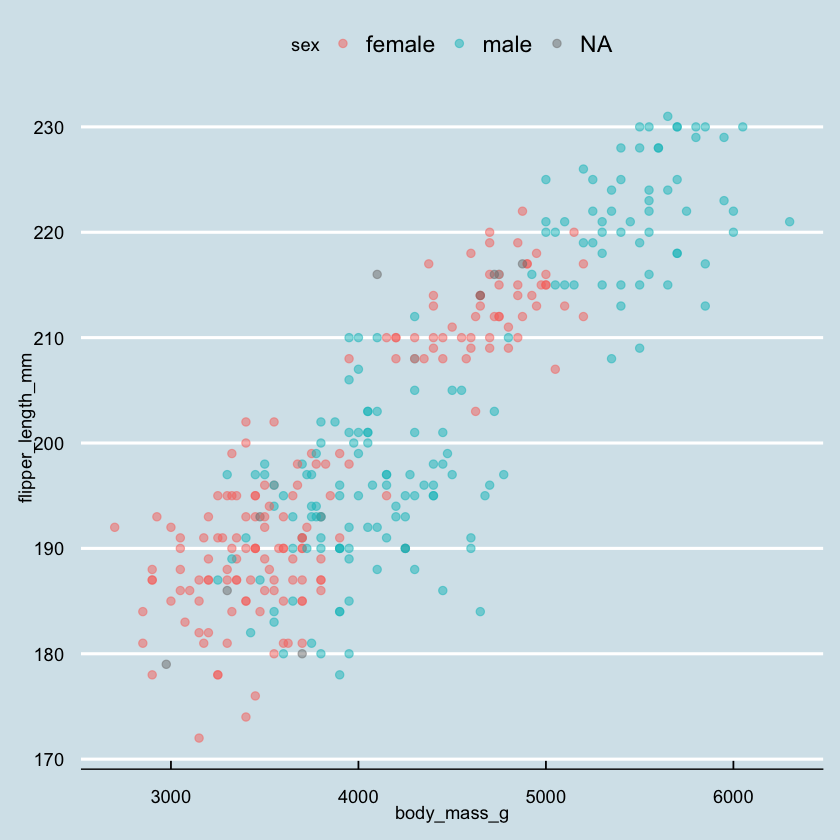

In [20]:
# BEGIN SOLUTION
# function docs TBD
library(ggthemes)
library(palmerpenguins)

#' Create scatter plot
#'
#' Generate a plot for a given data frame based on specified x, y columns
#' Colour the plot based on a gi
#'
#' @param data Data frame
#' @param x Unquoted column name to use as x axis - quantitative
#' @param y Unquoted column name to use as y axis - quantitative
#' @param colour_by Unquoted column name to use for colour - categorical
#'
#' @return Plot object
#' @export
#'
#' @examples 
#' library(palmerpenguins)
#' economist_scatter(penguins, body_mass_g, flipper_length_mm, sex)
economist_scatter <- function(data, x, y, colour_by) {
    if (!is.data.frame(data)) {
        stop("data should be a data frame")
    }
    if (!is.numeric(data |> pull({{ x }}))) {
        stop("x must be a numeric vector")
      }
    if (!is.numeric(data |> pull({{ y }}))) {
        stop("y must be a numeric vector")
    }
    if (!is.factor(data |> pull({{ colour_by }})) & !is.character(data |> pull({{ colour_by }})))  {
        stop("colour_by must be a character or a factor vector")
    }
    ggplot(penguins, aes(x = {{ x }}, y = {{ y }})) +
        geom_point(alpha = 0.5, size = 2, aes(colour = {{ colour_by }})) +
        theme_economist()
}

economist_scatter(penguins, body_mass_g, flipper_length_mm, sex)
## tests TBD
# END SOLUTION

Congratulations! You are done the lab!!! Pat yourself on the back, make sure you pushed 3 commits to GitHub and submit your worksheet to Gradescope!